In [44]:
# %pip install matplotlib pandas numpy seaborn

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
cols = np.load('../Data/Final/ClashOfClans_cols.npy', allow_pickle=True)
arr = np.load('../Data/Final/ClashOfClans.npy', allow_pickle=True)
df = pd.DataFrame(arr, columns=cols)

In [47]:
df = df[['post_id', 'time', 'post_text', 
              'shares', 'comments', 'comments_full', 
              'reaction_count', 'reactions', 'reactors']]

In [48]:
df['like'] = df['reactions'].map(lambda x: x['like'])
df['haha'] = df['reactions'].map(lambda x: x['haha'])
df['love'] = df['reactions'].map(lambda x: x['love'])
df['wow'] = df['reactions'].map(lambda x: x['wow'])
df['sad'] = df['reactions'].map(lambda x: x['sad'])
df['angry'] = df['reactions'].map(lambda x: x['angry'])
df['care'] = df['reactions'].map(lambda x: x['care'])

In [49]:
df[['shares', 'comments', 'reaction_count']] = df[['shares', 'comments', 'reaction_count']].astype(int)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   post_id         167 non-null    object        
 1   time            167 non-null    datetime64[ns]
 2   post_text       167 non-null    object        
 3   shares          167 non-null    int32         
 4   comments        167 non-null    int32         
 5   comments_full   167 non-null    object        
 6   reaction_count  167 non-null    int32         
 7   reactions       167 non-null    object        
 8   reactors        167 non-null    object        
 9   like            167 non-null    int64         
 10  haha            167 non-null    int64         
 11  love            167 non-null    int64         
 12  wow             167 non-null    int64         
 13  sad             167 non-null    int64         
 14  angry           167 non-null    int64         
 15  care  

In [51]:
df.describe()

,time,shares,comments,reaction_count,like,haha,love,wow,sad,angry,care
count,167,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,2023-07-10 06:43:55.670658816,187.215569,543.634731,6608.401198,4907.514970,91.071856,1382.167665,113.341317,12.970060,17.526946,83.808383
min,2022-12-12 17:57:11,3.000000,31.000000,358.000000,277.000000,0.000000,56.000000,1.000000,0.000000,0.000000,3.000000
25%,2023-04-24 05:01:35,29.000000,299.000000,2547.000000,1947.000000,12.500000,466.500000,10.000000,2.000000,4.000000,26.500000
50%,2023-08-15 15:00:49,42.000000,429.000000,4234.000000,3258.000000,23.000000,780.000000,15.000000,4.000000,7.000000,45.000000
75%,2023-09-30 09:07:58,101.000000,672.000000,6631.000000,4691.500000,41.500000,1476.500000,32.500000,10.500000,17.000000,85.000000
max,2023-11-07 20:15:02,14000.000000,3700.000000,248302.000000,206958.000000,3085.000000,33290.000000,4240.000000,528.000000,430.000000,3495.000000
std,NaN,1100.436557,456.975789,19276.037022,15936.195342,286.438466,2819.438079,477.783913,46.737208,39.996508,274.421142


In [52]:
df['reactions'][0]

{'like': 1470,
 'love': 353,
 'haha': 12,
 'wow': 9,
 'care': 28,
 'sad': 2,
 'angry': 2}

In [53]:
df['comments_full'][0][1]

{'comment_id': '317532330989943',
 'comment_url': 'https://facebook.com/317532330989943',
 'commenter_id': '100051419944069',
 'commenter_url': 'https://facebook.com/profile.php?id=100051419944069&eav=AfZF-_aUfS7q3jIE22CVYM-kC6xYXAl-PE2SHWhiu3BOuajbr3Th9uI1LglLRDW-bkk&fref=nf&rc=p&refid=52&__tn__=%7ER&paipv=0',
 'commenter_name': 'Huy Anh',
 'commenter_meta': None,
 'comment_text': 'đề nghị nhà phát hành game xem xét lại lỗi mất mạng là mất cả trận đấu. tôi vừa vào đánh war 7 ngày thì mất mạng ,vào thấy 0% . đề nghị nhà phát hành xem xét lại lỗi đó và phải khắc phục ngay . để trận đấu được tiếp tục ....',
 'comment_time': datetime.datetime(2023, 11, 7, 0, 0),
 'comment_image': 'https://scontent.fhan20-1.fna.fbcdn.net/m1/v/t6/An_UvxJXg9tdnLU3Y5qjPi0200MLilhzPXUgxzGjQzUMaNcmjdZA6anyrngvkdub33NZzZhd51fpCAEzNHFhko5aKRFP5fS1w_lKwYrzcNLupv27.png?ccb=10-5&oh=00_AfDL0NFvPSJ7sJzbMJ0FK3sxzAPxovKgphEn0FPnfjjWqg&oe=657653F9&_nc_sid=7da55a',
 'comment_reactors': [],
 'comment_reactions': None,
 'co

In [54]:
df['reactors'][0][:5]

[{'name': 'Di Mo',
  'link': 'https://facebook.com/profile.php?id=100095717490800&eav=AfZ2FUoxX2PgxTn4XSgGbIHR2X-tXfBztxof2m03YtIgziPK73GhoQWXLSTGzdHEYhY&fref=pb&paipv=0',
  'type': 'like'},
 {'name': 'Mike Bagahansol',
  'link': 'https://facebook.com/profile.php?id=100095305552506&eav=AfbwIFVbq4AFCX6B0nXac_Ds0V3klGFzHLnN9Z2f6FHDyBgKm24MRapr3nTW5OoC5OE&fref=pb&paipv=0',
  'type': 'love'},
 {'name': 'Prisca Dubois',
  'link': 'https://facebook.com/profile.php?id=100095214038423&eav=AfbYa7FwMAcUcagR6LQt4esnFlzWqKbfOS3pYHHO_n6A5SRM057_F4M-a5ZWC3yOyWc&fref=pb&paipv=0',
  'type': 'like'},
 {'name': 'Thein Hlaing',
  'link': 'https://facebook.com/theinhlaingmdl19par?eav=AfavYFJD9rxvlT83akrhorLTrjMLdyJsfZKTf44_-c8--gwaI2ynCclmFJQNuRSTIE4&fref=pb&paipv=0',
  'type': 'love'},
 {'name': 'Md Chanchal Chanchal',
  'link': 'https://facebook.com/profile.php?id=100094852464222&eav=Afb7hnfabpChsNLdlPYO5sMRI_7-eEIxO3hWcuBIlvGokP4p6-sdQHpjkBbfcIKDsbE&fref=pb&paipv=0',
  'type': 'like'}]

(<matplotlib.patches.Rectangle at 0x2885b4c9990>,
 (<matplotlib.patches.ConnectionPatch at 0x2885dbbfd90>,
  <matplotlib.patches.ConnectionPatch at 0x2885e2195d0>))

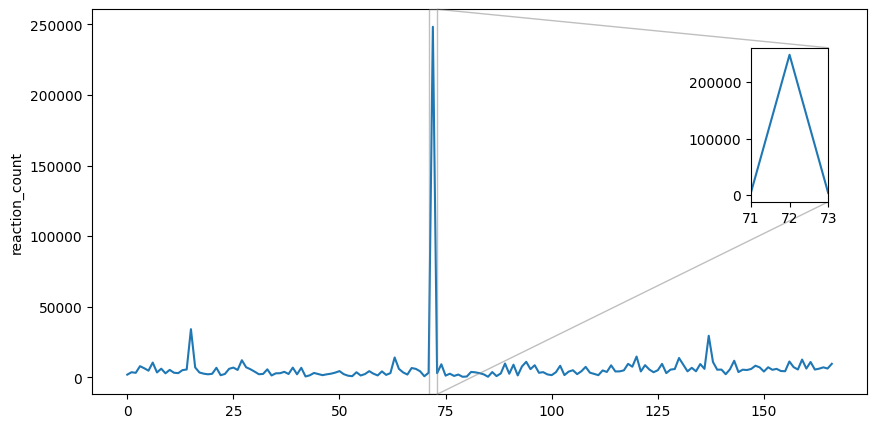

In [55]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(df['reaction_count'])

axin = ax.inset_axes([0.85, 0.5, 0.1, 0.4])
axin.plot(df['reaction_count'])
axin.set_xlim(71, 73)
ax.indicate_inset_zoom(axin)

In [56]:
df.loc[df['reaction_count'].idxmax()]

post_id                                             849314546550406
time                                            2023-08-23 23:48:43
post_text                The perfect tune for rolling into battle 😎
shares                                                        14000
comments                                                       2000
comments_full     [{'comment_id': '734816901799835', 'comment_ur...
reaction_count                                               248302
reactions         {'like': 206958, 'love': 33290, 'haha': 266, '...
reactors          [{'name': 'Mubasher Ali', 'link': 'https://fac...
like                                                         206958
haha                                                            266
love                                                          33290
wow                                                            4240
sad                                                              28
angry                                           

<Axes: ylabel='comments'>

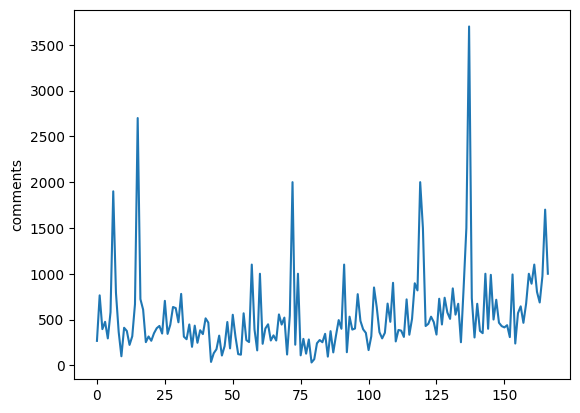

In [57]:
sns.lineplot(df['comments'])

In [58]:
df.loc[df['comments'] > 1500]

,post_id,time,post_text,shares,comments,comments_full,reaction_count,reactions,reactors,like,haha,love,wow,sad,angry,care
6,887129712768889,2023-11-01 22:32:35,Did you enjoy the Mashup Madness event? Tell u...,318,1900,"[{'comment_id': '1746006649181843', 'comment_u...",10423,"{'like': 4978, 'love': 4747, 'haha': 143, 'wow...","[{'name': 'LogicLoom Luminary', 'link': 'https...",4978,143,4747,13,282,26,234
15,882200249928502,2023-10-23 22:00:07,🚨CLASH OF CLANS is officially live on PC!\n\nA...,2100,2700,"[{'comment_id': '1015783102805700', 'comment_u...",34074,"{'like': 19748, 'love': 9303, 'haha': 390, 'wo...","[{'name': 'Noorullah Ramazani', 'link': 'https...",19748,390,9303,4097,34,12,490
72,849314546550406,2023-08-23 23:48:43,The perfect tune for rolling into battle 😎,14000,2000,"[{'comment_id': '734816901799835', 'comment_ur...",248302,"{'like': 206958, 'love': 33290, 'haha': 266, '...","[{'name': 'Mubasher Ali', 'link': 'https://fac...",206958,266,33290,4240,28,25,3495
119,6804789822878616,2023-05-16 14:41:30,edit: And we're back! Thanks for hanging in th...,66,2000,"[{'comment_id': '958144218755939', 'comment_ur...",7490,"{'like': 5550, 'love': 1530, 'haha': 64, 'wow'...","[{'name': 'Halil İbrahim Yaşar', 'link': 'http...",5550,64,1530,23,51,179,93
137,6586857294671871,2023-03-09 00:14:04,Happy #InternationalWomensDay!\n\n💐 💪,2000,3700,"[{'comment_id': '895985071731568', 'comment_ur...",29401,"{'like': 17082, 'love': 10909, 'haha': 564, 'w...","[{'name': 'Arash Jan', 'link': 'https://facebo...",17082,564,10909,177,51,25,593
165,6319757081381895,2022-12-14 19:40:13,Hey Chief! We'll take a maintenance break in ~...,41,1700,"[{'comment_id': '1345743539529532', 'comment_u...",6212,"{'like': 4950, 'love': 1025, 'haha': 43, 'wow'...","[{'name': 'Nivath Pich', 'link': 'https://face...",4950,43,1025,17,41,96,40


<Axes: ylabel='shares'>

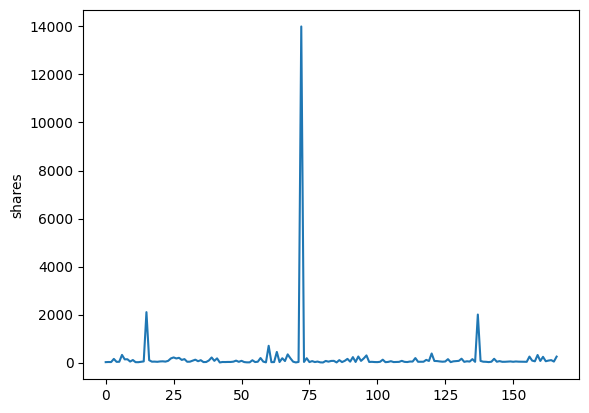

In [59]:
sns.lineplot(df['shares'])

In [60]:
df.loc[df['shares'].idxmax()]

post_id                                             849314546550406
time                                            2023-08-23 23:48:43
post_text                The perfect tune for rolling into battle 😎
shares                                                        14000
comments                                                       2000
comments_full     [{'comment_id': '734816901799835', 'comment_ur...
reaction_count                                               248302
reactions         {'like': 206958, 'love': 33290, 'haha': 266, '...
reactors          [{'name': 'Mubasher Ali', 'link': 'https://fac...
like                                                         206958
haha                                                            266
love                                                          33290
wow                                                            4240
sad                                                              28
angry                                           

In [61]:
df['time'].dt.hour.value_counts()

time
20    34
19    30
15    29
18    12
22    11
17    10
14     8
0      7
21     5
23     5
8      5
2      3
16     3
1      2
13     1
9      1
4      1
Name: count, dtype: int64

<Axes: >

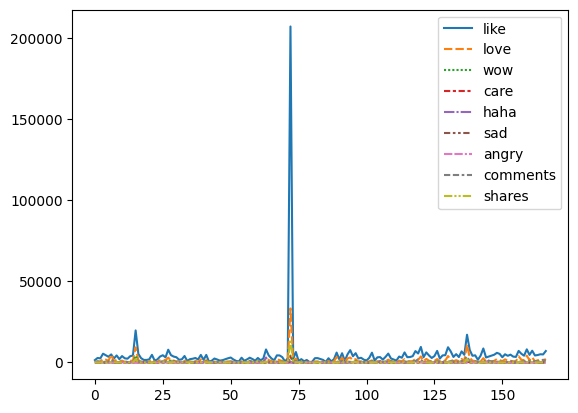

In [62]:
sns.lineplot(df[['like', 'love', 'wow', 'care', 'haha', 'sad', 'angry', 'comments', 'shares']])

In [63]:
df.drop([15, 72, 137], inplace=True)

In [64]:
df['weekday'] = df['time'].dt.weekday

c:\Users\longt\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


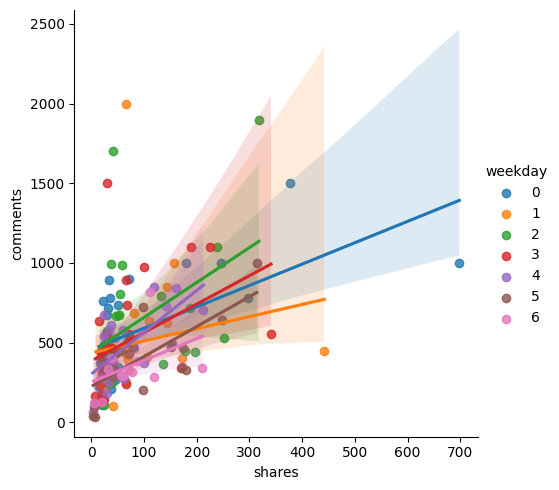

In [65]:
sns.lmplot(data=df, x='shares', y='comments', hue='weekday')

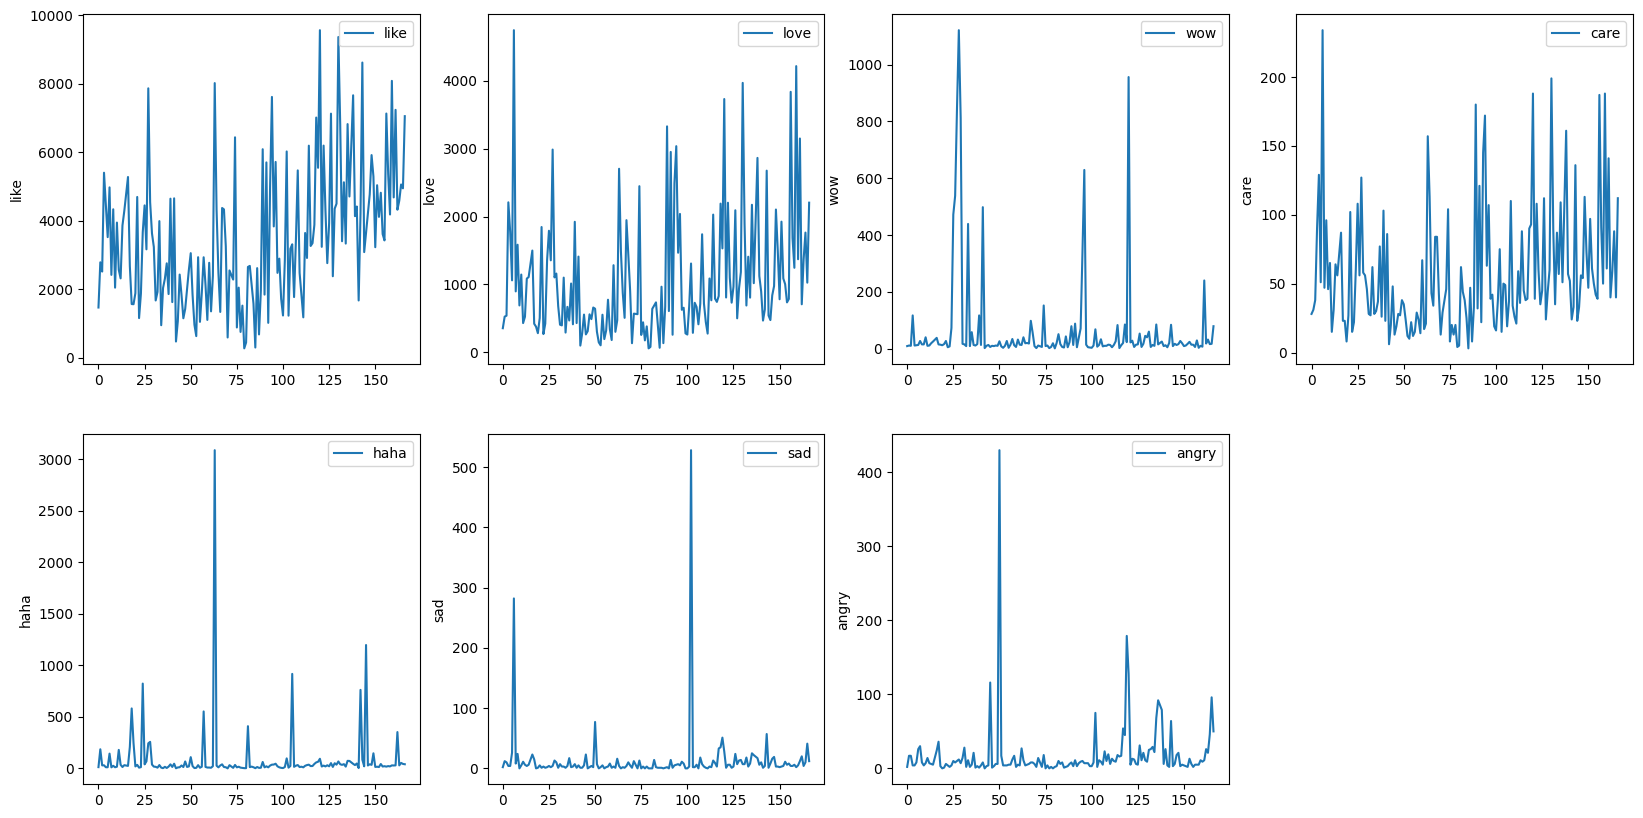

In [66]:
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

sns.lineplot(df['like'], ax=axs[0, 0], label='like')
sns.lineplot(df['love'], ax=axs[0, 1], label='love')
sns.lineplot(df['wow'], ax=axs[0, 2], label='wow')
sns.lineplot(df['care'], ax=axs[0, 3], label='care')
sns.lineplot(df['haha'], ax=axs[1, 0], label='haha')
sns.lineplot(df['sad'], ax=axs[1, 1], label='sad')
sns.lineplot(df['angry'], ax=axs[1, 2], label='angry')
axs[1, 3].remove()